In [1]:
import WECGrid

engine = WECGrid.Engine("./IEEE_30_bus.RAW")

engine.use(["psse"])


    Sets PSSE environment to latest minor version among installed versions of PSSE 35.
    Use psse35.set_minor(n) to set PSSE35 minor version (n) to use.
        Example, for PSSE 35.0.x, use this as: psse35.set_minor(0)

 PSS(R)E Xplore Version 35
 Copyright (c) 1976-2025
 Siemens Industry, Inc.,
 Power Technologies International                            (PTI)
 This program is a confidential  unpublished  work  created  and  first
 licensed in 1976.  It is a trade secret which is the property of  PTI.
 All use,  disclosure,  and/or reproduction not specifically authorized
 by  PTI  is prohibited.   This  program is protected  under  copyright
 laws  of  non-U.S.  countries  and  by  application  of  international
 treaties.  All  Rights  Reserved  Under  The  Copyright  Laws.


           SIEMENS POWER TECHNOLOGIES INTERNATIONAL

    50 BUS POWER SYSTEM SIMULATOR--PSS(R)E Xplore-35.3.2

             INITIATED ON SUN, MAY 11 2025  23:27

 Reading IC, SBASE, REV, XFRRAT, NXFRAT, BASF

In [2]:
config = {
    "simLength": 60 * 60 * 12,  # Simulation length of 12 hours
    "Tsample": 300,            # Sampling time of 5 minutes
    "waveHeight": 2.5,         # Wave height in meters
    "wavePeriod": 8,           # Wave period in seconds
}
engine.create_wec(ID=60, model="RM3", farm_size=8, ibus=31, jbus=1, mbase= 1.0, config=config) 



 Bus 31 [WEC BUS 31  132.00] added. Power flow data items with non-default values:
 X--DEFAULT---X  X---ACTUAL---X  DATA ITEM
          1               2      IDE
    0.00000         132.000      BASKV
 "            "  "WEC BUS 31  "  NAME

 Plant at bus 31 [WEC BUS 31  132.00] added. Data items with non-default values:
 X--DEFAULT---X  X---ACTUAL---X  DATA ITEM
          0              31      IREG

 Machine "G1" at bus 31 [WEC BUS 31  132.00] added. Power flow data items with non-default values:
 X--DEFAULT---X  X---ACTUAL---X  DATA ITEM
    100.000         1.00000      MBASE

 Machine "G2" at bus 31 [WEC BUS 31  132.00] added. Power flow data items with non-default values:
 X--DEFAULT---X  X---ACTUAL---X  DATA ITEM
    100.000         1.00000      MBASE

 Machine "G3" at bus 31 [WEC BUS 31  132.00] added. Power flow data items with non-default values:
 X--DEFAULT---X  X---ACTUAL---X  DATA ITEM
    100.000         1.00000      MBASE

 Machine "G4" at bus 31 [WEC BUS 31  132.00] adde

In [3]:
engine.psse.simulate()


 No power flow data changed for machine "G1" at bus 31 [WEC BUS 31  132.00]

 No power flow data changed for machine "G2" at bus 31 [WEC BUS 31  132.00]

 No power flow data changed for machine "G3" at bus 31 [WEC BUS 31  132.00]

 No power flow data changed for machine "G4" at bus 31 [WEC BUS 31  132.00]

 No power flow data changed for machine "G5" at bus 31 [WEC BUS 31  132.00]

 No power flow data changed for machine "G6" at bus 31 [WEC BUS 31  132.00]

 No power flow data changed for machine "G7" at bus 31 [WEC BUS 31  132.00]

 No power flow data changed for machine "G8" at bus 31 [WEC BUS 31  132.00]

          Generation at bus 31 [WEC BUS 31  132.00] will be treated as fixed output

  ITER       DELTAP      BUS         DELTAQ      BUS        DELTA/V/      BUS       DELTAANG      BUS
   0         0.0000(      6     )    0.0000(      4     )
                                                             0.00179(      2     )   0.00046(      2     )
   1         0.0000(      6    

In [16]:
engine.psse.generator_dataframe

,GEN_ID,BUS_ID,BUS_NAME,STATUS,PGEN_MW,QGEN_MVAR,MBASE,MVA,ZSOURCE,XTRAN,TAP,PCT_LOAD
0,1,1,GLEN LYN,1,260.821259,-16.794060,100.0,261.361359,0.0+1.0j,0.0+0.0j,1.0,261.361359
1,1,2,CLAYTOR,1,40.000000,50.000000,100.0,64.031242,0.0+1.0j,0.0+0.0j,1.0,64.031242
2,1,5,FIELDALE,1,0.000000,36.847721,100.0,36.847721,0.0+1.0j,0.0+0.0j,1.0,36.847721
3,1,8,REUSENS,1,0.000000,37.142170,100.0,37.142170,0.0+1.0j,0.0+0.0j,1.0,37.142170
4,1,11,ROANOKE,1,0.000000,16.171377,100.0,16.171377,0.0+1.0j,0.0+0.0j,1.0,16.171377
5,1,13,HANCOCK,1,0.000000,10.618210,100.0,10.618210,0.0+1.0j,0.0+0.0j,1.0,10.618210
6,G1,31,WEC BUS 31,1,0.016066,0.000000,1.0,0.016066,0.0+1.0j,0.0+0.0j,1.0,1.606647
7,G2,31,WEC BUS 31,1,0.016066,0.000000,1.0,0.016066,0.0+1.0j,0.0+0.0j,1.0,1.606647
8,G3,31,WEC BUS 31,1,0.016066,0.000000,1.0,0.016066,0.0+1.0j,0.0+0.0j,1.0,1.606647
9,G4,31,WEC BUS 31,1,0.016066,0.000000,1.0,0.016066,0.0+1.0j,0.0+0.0j,1.0,1.606647


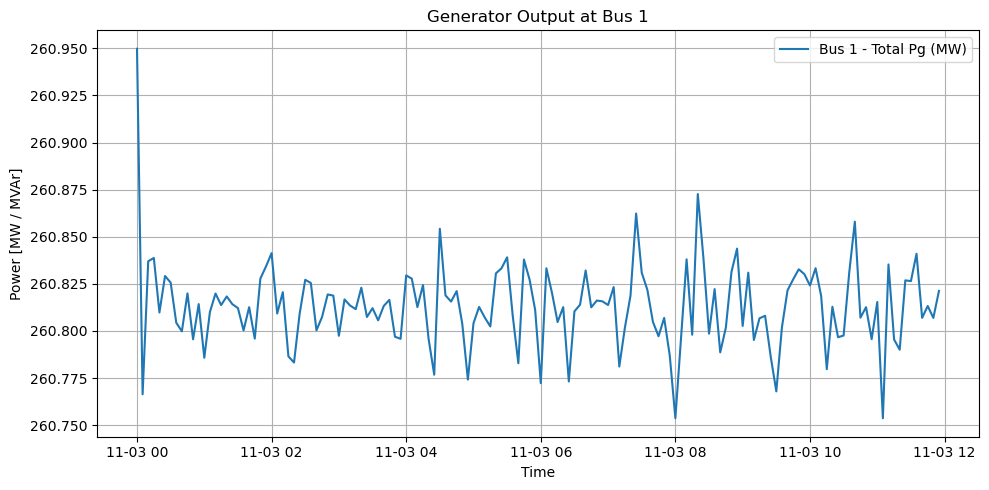

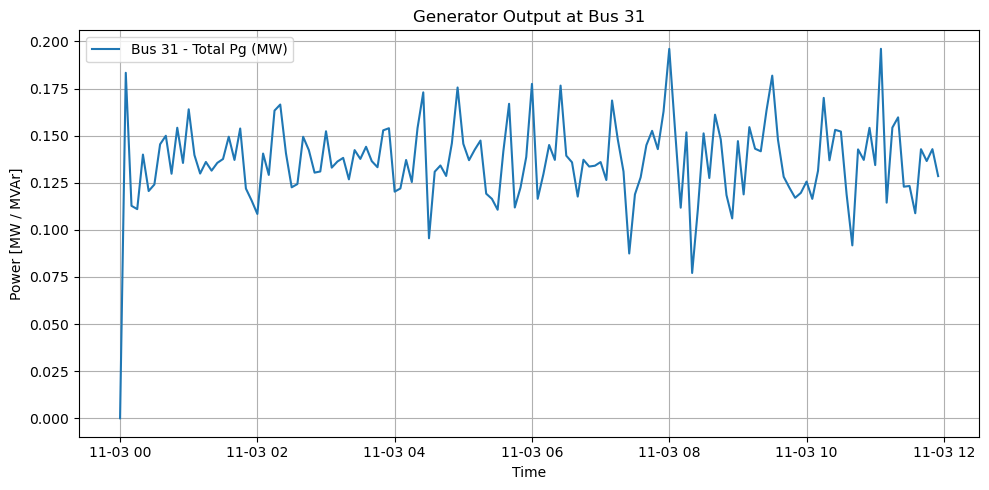

In [26]:
import matplotlib.pyplot as plt

def plot_bus_voltages(engine, bus_id=None):
    """
    Plot bus voltages over time.
    
    Args:
        engine: Your WECGridEngine instance
        bus_id (int, optional): If provided, only plot this bus. Otherwise all buses.
    """
    times = [snap.snapshot for snap in engine.psse.snapshot_history]
    df_list = [snap.buses for snap in engine.psse.snapshot_history]

    if not df_list:
        print("No snapshots to plot.")
        return

    # Collect all bus IDs
    bus_ids = df_list[0]["BUS_ID"].tolist() if bus_id is None else [bus_id]

    plt.figure(figsize=(10, 5))
    for bid in bus_ids:
        v_pu = [df[df["BUS_ID"] == bid]["MISMATCH_MVA"].values[0] if bid in df["BUS_ID"].values else None for df in df_list]
        plt.plot(times, v_pu, label=f"Bus {bid}")

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
import matplotlib.pyplot as plt

def plot_generator_output(engine, gen_id=None, show_reactive=False):
    """
    Plot generator output (Pg and optionally Qg) over time.

    Args:
        engine: Your WECGridEngine instance
        gen_id (str, optional): Specific generator ID to plot. If None, plots all.
        show_reactive (bool): Include Qg (reactive power) in the plot.
    """
    times = [snap.snapshot for snap in engine.psse.snapshot_history]
    df_list = [snap.generators for snap in engine.psse.snapshot_history]

    if not df_list:
        print("No generator snapshots to plot.")
        return

    # Get list of all GEN_IDs (from first snapshot only)
    gen_ids = df_list[0]["GEN_ID"].tolist() if gen_id is None else [gen_id]

    plt.figure(figsize=(10, 5))
    for gid in gen_ids:
        try:
            pg = [df[df["GEN_ID"] == gid]["PGEN_MW"].values[0] if gid in df["GEN_ID"].values else None for df in df_list]
            plt.plot(times, pg, label=f"{gid} - Pg")
            if show_reactive:
                qg = [df[df["GEN_ID"] == gid]["QGEN_MVAR"].values[0] if gid in df["GEN_ID"].values else None for df in df_list]
                plt.plot(times, qg, linestyle="--", label=f"{gid} - Qg")
        except IndexError:
            print(f"Skipping {gid}: not found in one or more snapshots.")

    plt.xlabel("Time")
    plt.ylabel("Power Output [MW / MVar]")
    plt.title("Generator Output Over Time")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
import matplotlib.pyplot as plt

def plot_generators_at_bus(engine, bus_id: int, show_reactive=False):
    """
    Plots total Pg (and optionally Qg) over time for all generators at the specified bus.

    Args:
        engine: The WECGridEngine instance.
        bus_id (int): The bus number to filter by.
        show_reactive (bool): Whether to include Qg (reactive power) in the plot.
    """
    snapshots = engine.psse.snapshot_history
    if not snapshots:
        print("No generator snapshots found.")
        return

    times = [snap.snapshot for snap in snapshots]
    total_pg = []
    total_qg = []

    for snap in snapshots:
        df = snap.generators
        bus_gens = df[df["BUS_ID"] == bus_id]
        total_pg.append(bus_gens["PGEN_MW"].sum())
        if show_reactive:
            total_qg.append(bus_gens["QGEN_MVAR"].sum())

    plt.figure(figsize=(10, 5))
    plt.plot(times, total_pg, label=f"Bus {bus_id} - Total Pg (MW)")
    if show_reactive:
        plt.plot(times, total_qg, '--', label=f"Bus {bus_id} - Total Qg (MVAr)")

    plt.title(f"Generator Output at Bus {bus_id}")
    plt.xlabel("Time")
    plt.ylabel("Power [MW / MVAr]")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_generators_at_bus(engine, bus_id=1, show_reactive=False)
plot_generators_at_bus(engine, bus_id=31, show_reactive=False)

In [4]:
engine.wecObj_list[0].dataframe

,time,ibus,pg,vs,pt,pb,qt,qb,snapshots
0,0.0,1.0,0.000000,1.0,0.000000,0.0,0.000000,0.000000,1997-11-03 00:00:00
1,450.0,1.0,0.022921,1.1,0.022921,0.0,0.055379,-0.055379,1997-11-03 00:05:00
2,750.0,1.0,0.014095,1.1,0.014095,0.0,0.058254,-0.058254,1997-11-03 00:10:00
3,1050.0,1.0,0.013875,1.1,0.013875,0.0,0.058363,-0.058363,1997-11-03 00:15:00
4,1350.0,1.0,0.017494,1.1,0.017494,0.0,0.057380,-0.057380,1997-11-03 00:20:00
...,...,...,...,...,...,...,...,...,...
139,41850.0,1.0,0.013602,1.1,0.013602,0.0,0.058413,-0.058413,1997-11-03 11:35:00
140,42150.0,1.0,0.017850,1.1,0.017850,0.0,0.057228,-0.057228,1997-11-03 11:40:00
141,42450.0,1.0,0.017066,1.1,0.017066,0.0,0.057459,-0.057459,1997-11-03 11:45:00
142,42750.0,1.0,0.017854,1.1,0.017854,0.0,0.057247,-0.057247,1997-11-03 11:50:00


In [1]:
from WecGrid import WecGrid

wec_grid = WecGrid(case="./IEEE_30_bus.RAW")
wec_grid.initialize_psse()
wec_grid.initialize_pypsa()

config = {
    "simLength": 60 * 60 * 12,  # Simulation length of 12 hours
    "Tsample": 300,            # Sampling time of 5 minutes
    "waveHeight": 2.5,         # Wave height in meters
    "wavePeriod": 8,           # Wave period in seconds
}
wec_grid.create_wec(ID=60, model="RM3", farm_size=8, ibus=31, jbus=1, mbase= 1.0, config=config) 

wec_grid.psseObj.simulate(load_curve=True)

wec_grid.pypsaObj.simulate(load_curve=True)

    Sets PSSE environment to latest minor version among installed versions of PSSE 35.
    Use psse35.set_minor(n) to set PSSE35 minor version (n) to use.
        Example, for PSSE 35.0.x, use this as: psse35.set_minor(0)

 PSS(R)E Xplore Version 35
 Copyright (c) 1976-2025
 Siemens Industry, Inc.,
 Power Technologies International                            (PTI)
 This program is a confidential  unpublished  work  created  and  first
 licensed in 1976.  It is a trade secret which is the property of  PTI.
 All use,  disclosure,  and/or reproduction not specifically authorized
 by  PTI  is prohibited.   This  program is protected  under  copyright
 laws  of  non-U.S.  countries  and  by  application  of  international
 treaties.  All  Rights  Reserved  Under  The  Copyright  Laws.


           SIEMENS POWER TECHNOLOGIES INTERNATIONAL

    50 BUS POWER SYSTEM SIMULATOR--PSS(R)E Xplore-35.3.2

             INITIATED ON FRI, MAY 09 2025  13:40
not a valid solver
[Snapshot] t=1746823234.57,

case data: 0     100.00  33  0  0  60.00       
record 1:  08/20/93 UW ARCHIVE           100.0  1961 W IEEE 30 Bus Test Case
record 2: 
parsed 30 buses
parsed 21 loads
parsed 2 fixed shunts
parsed 6 generators
parsed 37 branches
parsed 4 transformers
parsed 1 areas
parsed 0 two terminal dc lines
parsed 0 vsc dc lines
parsed 0 transformer corrections
parsed 0 multi-terminal dc lines
parsed 0 multi-section lines
parsed 1 zones
parsed 0 inter-area transfers
parsed 1 owners
parsed 0 facts devices
parsed 0 switched shunts
parsed 0 induction machines
un-parsed lines:
  Q



ZeroDivisionError: float division by zero